Name = Goutam Kumar Sah

Roll Number = 2312res271

Experiment No = 7

Title = K-means clustering

Aim = Implementation of K-means clustering Algorithm

# Theory

K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping subsets, or clusters. The goal is to group data points in such a way that those within the same cluster are more similar to each other than to those in other clusters, based on certain distance metrics (commonly Euclidean distance).

**Main Objective:**

The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another.

K-means Clustering algorithm work



1.   Initialization: Choose the number of clusters, K, and randomly select K initial centroids (cluster centers) from the data points.
2.  Assignment Step: Each data point is assigned to the nearest cluster centroid, forming K clusters.
3. Update Step: Calculate the new centroids by taking the average of the data points assigned to each cluster.
4. Iteration: Repeat the assignment and update steps until the centroids no longer move significantly or a predefined number of iterations is reached.





Platform = Google colab


Manual code

In [88]:
import random
import numpy as np

class K_means:
    def __init__(self, n_clusters=2, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)





In [89]:
import pandas as pd
df = pd.read_csv('/content/student_clustering (1).csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [90]:
import pandas as pd

X = df.iloc[:, :].values
# Initialize and fit the KMeans model
kmeans = K_means(n_clusters=4, max_iter=500)
y_means = kmeans.fit_predict(X)


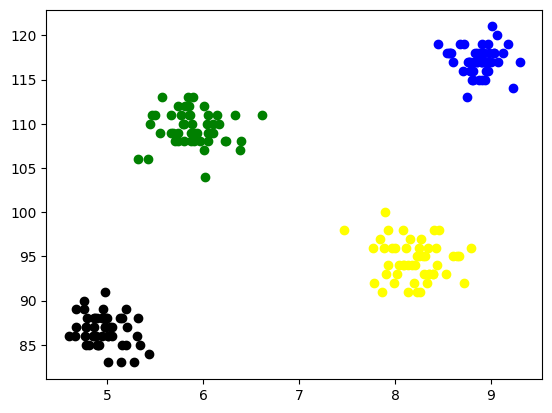

In [103]:
X = df.iloc[:, :].values
km = K_means(n_clusters=4,max_iter=100)
y_means = km.fit_predict(X)
y_means
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='Black')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.show()

By using Sk learn library


In [104]:
from sklearn.cluster import KMeans
import numpy as np



 # Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=42)
kmeans.fit(X)

    # Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print the final centroids
print("Centroids:\n", centroids)

    # Print the sum of squared errors (inertia)
sse = kmeans.inertia_
print("Sum of Squared Errors (SSE):", sse)


Centroids:
 [[  7.39686869 113.43434343]
 [  4.9676      86.7       ]
 [  8.15705882  94.78431373]]
Sum of Squared Errors (SSE): 2364.0055834200834


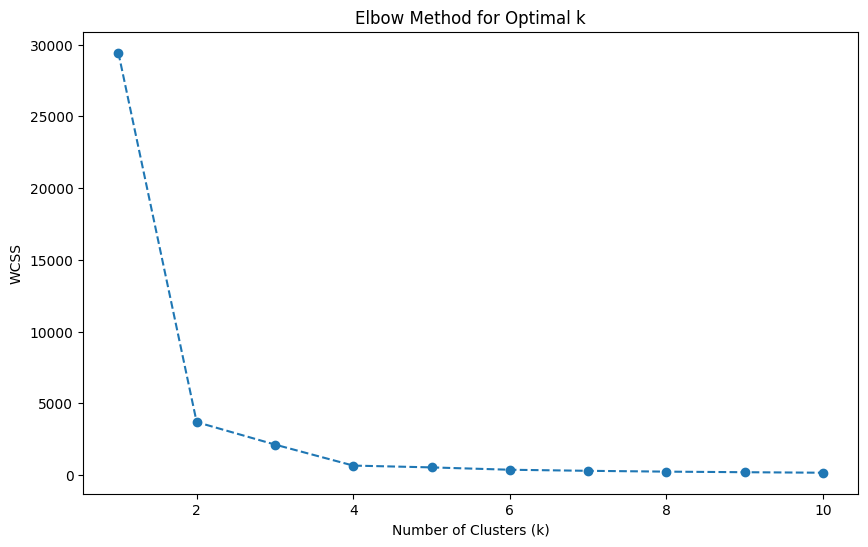

In [105]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example usage:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [109]:
import numpy as np
X = df.iloc[:, :].values

km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(X)
y_predicted

array([0, 2, 3, 3, 2, 2, 3, 1, 2, 3, 0, 2, 3, 0, 2, 3, 2, 3, 2, 2, 3, 0,
       3, 0, 0, 3, 0, 1, 3, 2, 1, 2, 1, 2, 3, 3, 1, 2, 0, 2, 0, 3, 3, 0,
       1, 1, 3, 2, 1, 2, 0, 0, 1, 3, 1, 2, 2, 1, 2, 1, 2, 3, 3, 1, 0, 1,
       3, 0, 2, 3, 2, 1, 3, 0, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 3, 0, 3, 3, 1, 3, 0, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 1,
       3, 1, 2, 2, 3, 1, 3, 2, 1, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 3, 2,
       0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1,
       0, 3, 2, 1, 2, 3, 0, 1, 2, 3, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 1, 2, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 0, 1, 2,
       2, 1], dtype=int32)

In [110]:
X[y_predicted == 3, 1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

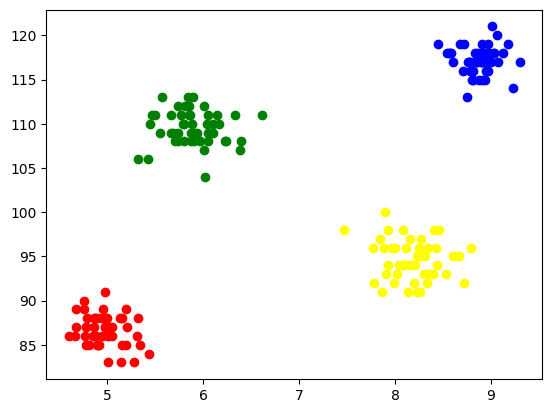

In [111]:
plt.scatter(X[y_predicted == 0, 0], X[y_predicted == 0, 1], color='red')
plt.scatter(X[y_predicted == 1, 0], X[y_predicted == 1, 1], color='blue')
plt.scatter(X[y_predicted == 2, 0], X[y_predicted == 2, 1], color='green')
plt.scatter(X[y_predicted == 3, 0], X[y_predicted == 3, 1], color='yellow')
plt.show()